<a href="https://colab.research.google.com/github/iMan0405/artificial_intelligence/blob/master/Amaliyot_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amaliyot. Simple Linear Regression

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

### Linear Regression

In [103]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head(10)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200
7,"город Ташкент, Яккасарайский район, Саламатина",Яккасарайский,2,32,5,5,20000
8,"город Ташкент, Учтепинский район, Чиланзар-21",Учтепинский,2,51,3,4,26200
9,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,1,30,1,4,22200


In [104]:
df.drop('location', axis=1, inplace=True)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000
5,Чиланзарский,1,28,1,4,25500
6,Чиланзарский,1,30,2,4,21200
7,Яккасарайский,2,32,5,5,20000
8,Учтепинский,2,51,3,4,26200
9,Чиланзарский,1,30,1,4,22200


In [105]:
df.drop([5347], inplace=True)
df[df['size'] == 'Площадьземли:1сот']

,district,rooms,size,level,max_levels,price


In [106]:
dfindex = df[df['price'] == 'Договорная'].index
df.drop(dfindex, inplace=True)
df[df['price'] == 'Договорная']

,district,rooms,size,level,max_levels,price


In [107]:
df['rooms'] = df['rooms'].astype('float')
df['size'] = df['size'].astype('float')
df['level'] = df['level'].astype('float')
df['max_levels'] = df['max_levels'].astype('float')
df['price'] = df['price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7465 non-null   object 
 1   rooms       7465 non-null   float64
 2   size        7465 non-null   float64
 3   level       7465 non-null   float64
 4   max_levels  7465 non-null   float64
 5   price       7465 non-null   float64
dtypes: float64(5), object(1)
memory usage: 408.2+ KB


In [108]:
dfind = df[df['price']>200000].index
df.drop(dfind, inplace=True)

In [109]:
df.to_csv('housing_LR.csv')

In [110]:
df = pd.read_csv('housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3.0,57.0,4.0,4.0,52000.0
1,Яккасарайский,2.0,52.0,4.0,5.0,56000.0
2,Чиланзарский,2.0,42.0,4.0,4.0,37000.0
3,Чиланзарский,3.0,65.0,1.0,4.0,49500.0
4,Чиланзарский,3.0,70.0,3.0,5.0,55000.0
5,Чиланзарский,1.0,28.0,1.0,4.0,25500.0
6,Чиланзарский,1.0,30.0,2.0,4.0,21200.0
7,Яккасарайский,2.0,32.0,5.0,5.0,20000.0
8,Учтепинский,2.0,51.0,3.0,4.0,26200.0
9,Чиланзарский,1.0,30.0,1.0,4.0,22200.0


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [111]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1348
Учтепинский           873
Юнусабадский          850
Мирабадский           717
Яккасарайский         628
Яшнободский           458
Шайхантахурский       363
Олмазорский           264
Сергелийский          160
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [112]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2.0,42.0,4.0,4.0,37000.0
3,Чиланзарский,3.0,65.0,1.0,4.0,49500.0
4,Чиланзарский,3.0,70.0,3.0,5.0,55000.0
5,Чиланзарский,1.0,28.0,1.0,4.0,25500.0
6,Чиланзарский,1.0,30.0,2.0,4.0,21200.0


In [113]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7504    70.0
7522    20.0
7533    32.0
7545    70.0
7564    30.0
Name: size, Length: 1616, dtype: float64

In [114]:
Y = housing['price']
Y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7504    48000.0
7522    18500.0
7533    28000.0
7545    49800.0
7564    22914.0
Name: price, Length: 1616, dtype: float64

**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

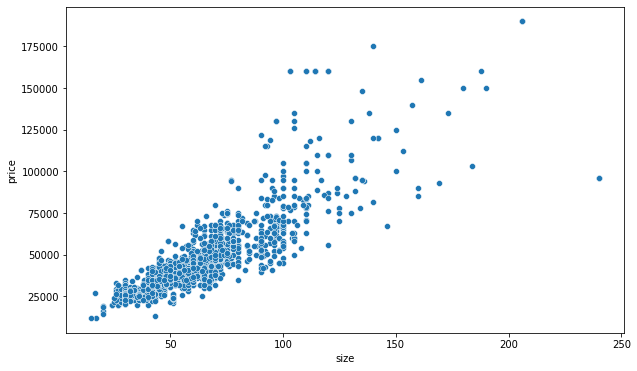

In [116]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

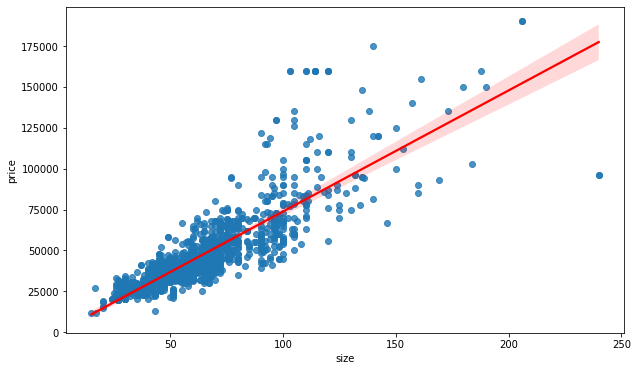

In [117]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [118]:
X_list = []
for i in X:
  X_list.append(i)
X_list[1615]

30.0

In [119]:
Y_list = []
for i in Y:
  Y_list.append(i)
Y_list[1615]

22914.0

In [120]:
T1_list = []
for i in range(0, 1615):
  T1 = np.sum((X_list[i] - np.mean(X)) * (Y_list[i] - np.mean(Y))) / np.sum(np.power((X_list[i] - np.mean(X)), 2))
  T1_list.append(T1)

In [121]:
T0_list = []
for i in range(0, 1615):
  T0 = np.mean(Y) - T1_list[i] * np.mean(X)
  T0_list.append(T0)

## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [122]:
y_predicted = []
for i in range(0, 1615):
  new_y = T0_list[i] + T1_list[i] * X_list[i]
  y_predicted.append(new_y)
y_predicted[:10]

[37000.0,
 49499.99999999999,
 54999.99999999999,
 25500.000000000004,
 21200.000000000004,
 22200.0,
 30199.99999999997,
 21200.000000000004,
 21200.000000000004,
 21200.000000000004]

## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

MAE

In [123]:
def mae(y_true, y_pred):
    n = 1616
    error = 0
    for i in range(0, 1615):
        error += abs(y_true[i] - y_pred[i])
    mae = error / n
    return mae
mae(Y_list, y_predicted)

2.685710839641345e-12

RMSE

In [124]:
import math

def rmse(y_true, y_pred):
    n = 1616
    error = 0
    for i in range(0, 1615):
        error += (y_true[i] - y_pred[i])**2
    mse = error / n
    rmse = math.sqrt(mse)
    return rmse
rmse(Y_list, y_predicted)

7.989245310602892e-12